<a href="https://colab.research.google.com/github/Abhisek910/Titanic-Prediction-Classification/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic


<a id="Introduction"></a> <br> 
# **1. Introduction:** 
<h3> The data have 891 entries on train dataset and 418 on test dataset</h3>
- 10 columns in train_csv and 9 columns in train_test


<h2>Competition Description: </h2>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<h3>Data Dictionary</h3><br>
Variable	Definition	Key<br>
<b>survival</b>	Survival	0 = No, 1 = Yes<br>
<b>pclass</b>	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd<br>
<b>sex</b>	Sex	<br>
<b>Age</b>	Age in years	<br>
<b>sibsp</b>	# of siblings / spouses aboard the Titanic	<br>
<b>parch</b>	# of parents / children aboard the Titanic	<br>
<b>ticket</b>	Ticket number	<br>
<b>fare</b>	Passenger fare	<br>
<b>cabin</b>	Cabin number	<br>
<b>embarked	</b>Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<br>
<h3>Variable Notes</h3><br>
<b>pclass: </b>A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>
<b>age: </b>Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>
<b>sibsp:</b> The dataset defines family relations in this way...<br>
- <b>Sibling </b>= brother, sister, stepbrother, stepsister<br>
- <b>Spouse </b>= husband, wife (mistresses and fiancés were ignored)<br>

<b>parch: </b>The dataset defines family relations in this way...<br>
- <b>Parent</b> = mother, father<br>
- <b>Child </b>= daughter, son, stepdaughter, stepson<br>

Some children travelled only with a nanny, therefore parch=0 for them.<br>

<a id="Librarys"></a> <br> 
# **2. Librarys:** 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [6]:
!wget https://raw.githubusercontent.com/Abhisek910/Titanic-Prediction-Classification/main/Data/train.csv
!wget https://raw.githubusercontent.com/Abhisek910/Titanic-Prediction-Classification/main/Data/test.csv

--2021-12-17 08:26:44--  https://raw.githubusercontent.com/Abhisek910/Titanic-Prediction-Classification/main/Data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-12-17 08:26:44 (4.04 MB/s) - ‘train.csv.1’ saved [60302/60302]

--2021-12-17 08:26:44--  https://raw.githubusercontent.com/Abhisek910/Titanic-Prediction-Classification/main/Data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


<a id="Known"></a> <br> 
# **3. First look at the data:** 

In [7]:
train_data =pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

In [14]:
def data_pipeline(data):
  data["Age"].fillna((data["Age"].mean()), inplace=True)
  data  =data.drop(["Name","Ticket"],axis=1)
  data.Sex.replace(to_replace=dict(female=1, male=0), inplace=True)
  data.Embarked.replace(to_replace=dict(Q=1,C=2,S=3), inplace=True  )
  data["Embarked"].fillna((data["Embarked"].mean()),inplace=True)
  data["Deck"] =data["Cabin"].str.extract('([A-Za-z])',expand=False)
  data.Deck.replace(to_replace=dict(A=1, B=2, C=3, D=4, E=5, F=6, G=7, T=8), inplace=True)
  data["Deck"].fillna((data['Deck'].median()), inplace=True)
  data=data.drop(["Cabin"],axis=1)
  data["Fare"].fillna((data['Fare'].mean()), inplace=True)

  return data

In [15]:
train_data=data_pipeline(train_data)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,0,22.000000,1,0,7.2500,3.0,3.0
1,2,1,1,1,38.000000,1,0,71.2833,2.0,3.0
2,3,1,3,1,26.000000,0,0,7.9250,3.0,3.0
3,4,1,1,1,35.000000,1,0,53.1000,3.0,3.0
4,5,0,3,0,35.000000,0,0,8.0500,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,3.0,3.0
887,888,1,1,1,19.000000,0,0,30.0000,3.0,2.0
888,889,0,3,1,29.699118,1,2,23.4500,3.0,3.0
889,890,1,1,0,26.000000,0,0,30.0000,2.0,3.0


<a id="Known"></a> <br> 
# **4. Exploring the data:** 


### Outlier Visualization, Interpretation and Handling


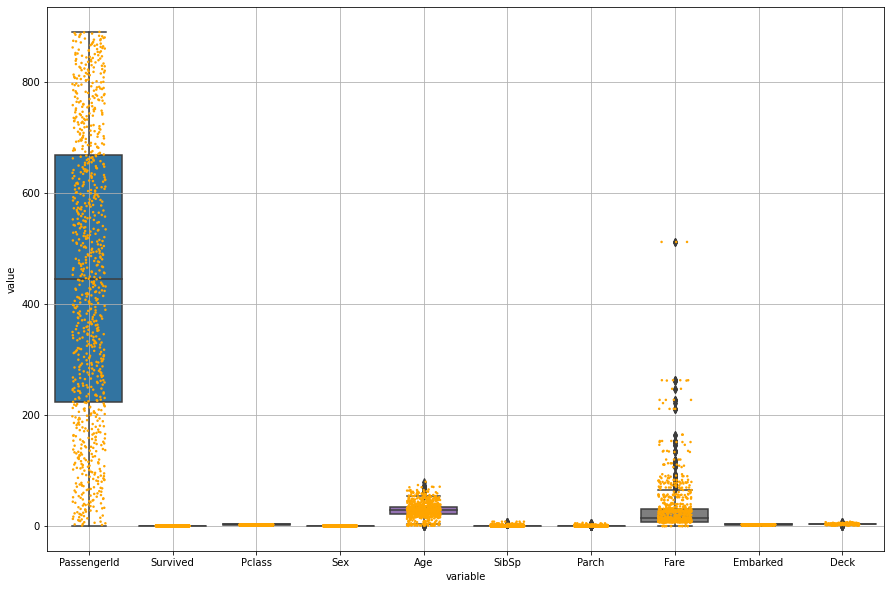

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(train_data))
sns.stripplot(x="variable", y="value", data=pd.melt(train_data),
              color="orange", jitter=0.2,size=2.5)
plt.grid();

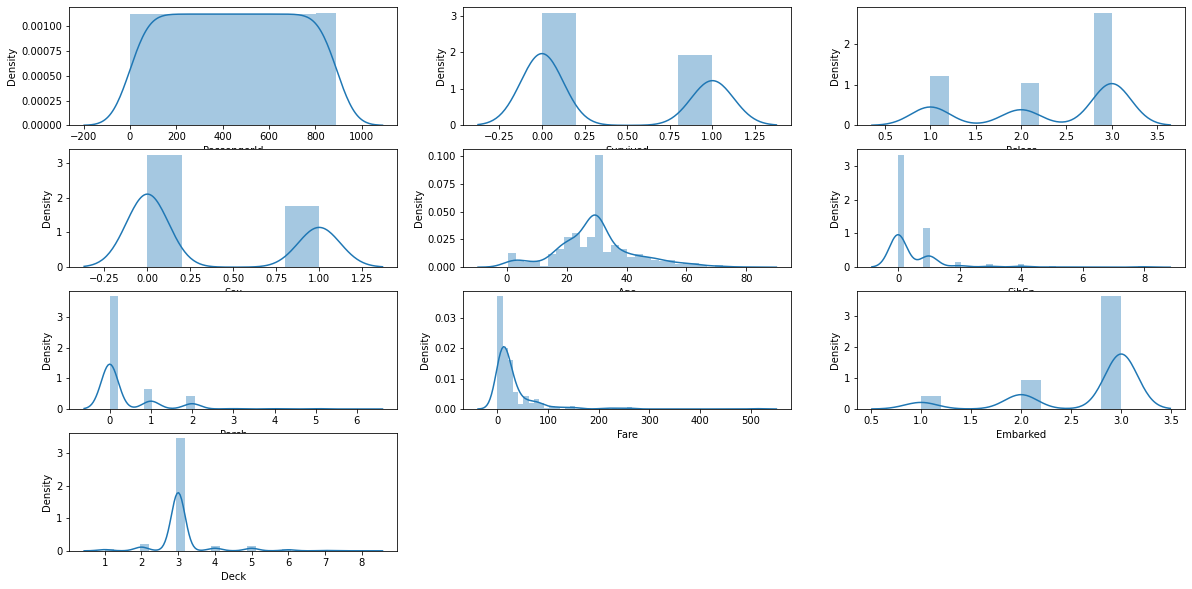

In [19]:
import warnings
warnings.filterwarnings("ignore")

a=1
plt.figure(figsize=(20, 10))
for i in train_data.columns:
    plt.subplot(4, 3, a)
    sns.distplot(train_data[i])
    a += 1
plt.show()

#### Hypothesis 1: Not one of the columns are normal distriuted

This will be evaluated by using the p-value measurement:

${\displaystyle p=2\min\{\Pr(T\geq t\mid H_{0}),\Pr(T\leq t\mid H_{0})\}}$ for a two-sided test. If distribution ${\displaystyle T}$ is symmetric about zero, then ${\displaystyle p=\Pr(|T|\geq |t|\mid H_{0})}{\displaystyle p=\Pr(|T|\geq |t|\mid H_{0})}$

In [20]:
# Shapiro-Wilk Test
for col in train_data:
    stat, p = shapiro(train_data[col])
    print("----------------------------------------------")
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

----------------------------------------------
PassengerId
Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Survived
Statistics=0.617, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Pclass
Statistics=0.718, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Sex
Statistics=0.604, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Age
Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
SibSp
Statistics=0.513, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Parch
Statistics=0.533, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Fare
Statistics=0.522, p=0.000
Sample does not look Gaussian (reject H0)
---------------------------

### Outlier handling
We do not handle any outliers for the following reason:
- a woman, with age 70 in the 3rd class has it a lot harder than a man, with 30 ages and in the 1st class

This statement will be proven in the section visualizations...

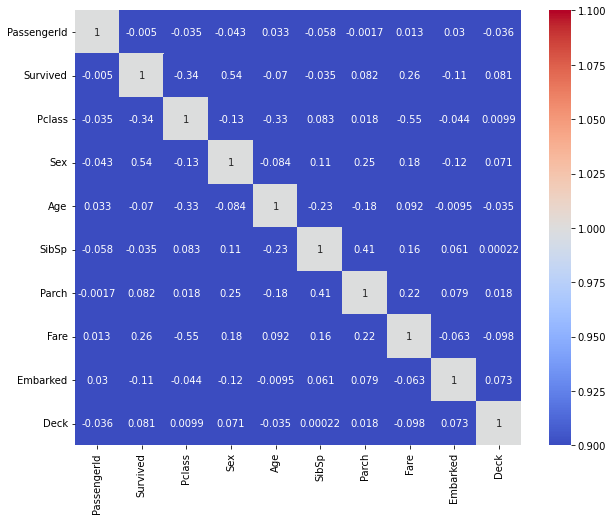

In [22]:
# Visualize correlations of each column (not necessary but for interest)
correlations=train_data.corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(correlations, vmin=1, cmap="coolwarm", annot=True);

### Visualization

#### More Men than Women died:

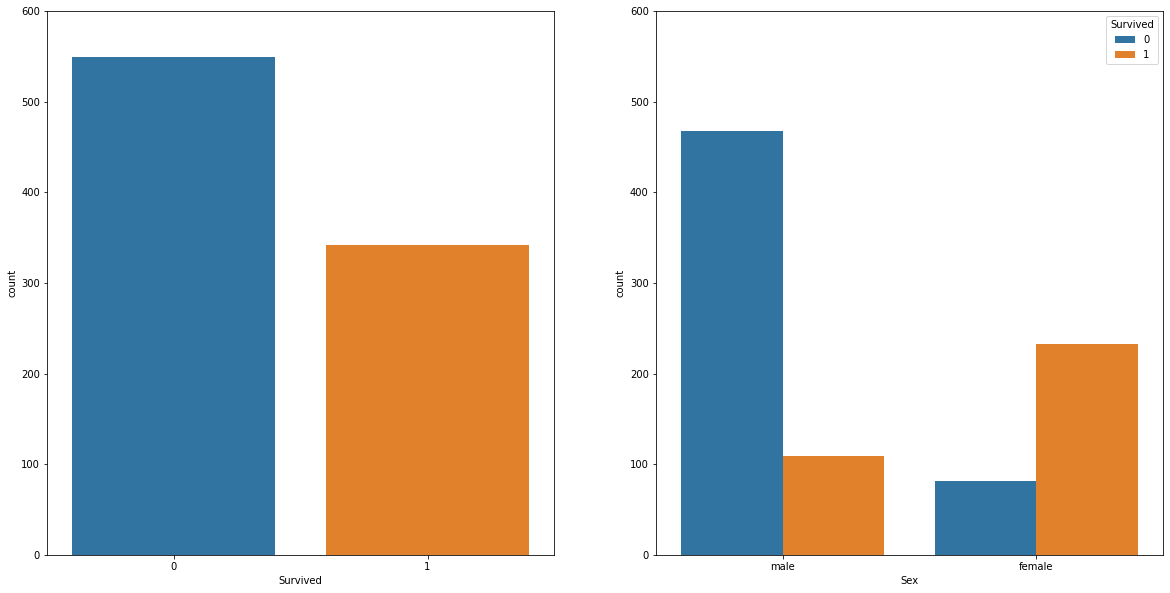

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.ylim(0,600)
sns.countplot(data=train_data, x="Survived")

plt.subplot(1,2,2)
fig_2=sns.countplot(data=train_data, x="Sex", hue="Survived")
fig_2.set_xticklabels(["male", "female"])
plt.ylim(0,600)
plt.show(fig_2.containers[0])
plt.show(fig_2.containers[1])
plt.show();

#### Persons which are in the Age Group 30 are died the most but not in percentage:

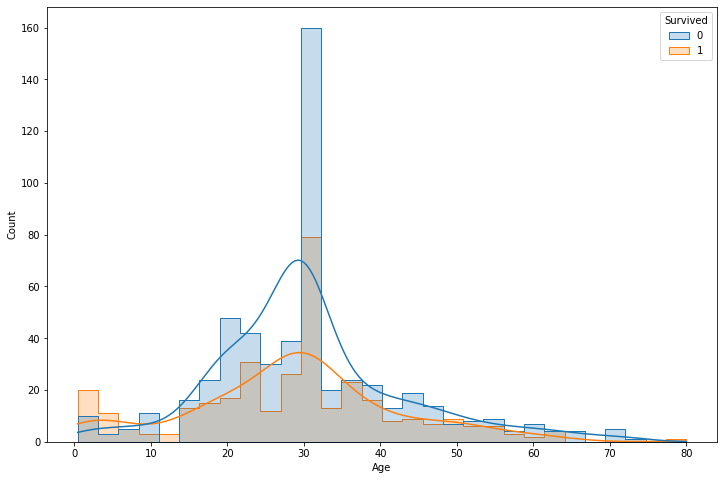

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data=train_data, x="Age", hue="Survived", element="step", kde=True)


 According to the Classes 1-3 (1 = 1st class (best class) -> upper levels of the ship, 2 = 2nd class -> middle level of the ship, 3 = 3rd class -> lower levels of the ship) this means that passengers in the 3rd class had it harder to get on top than 1st class passengers:

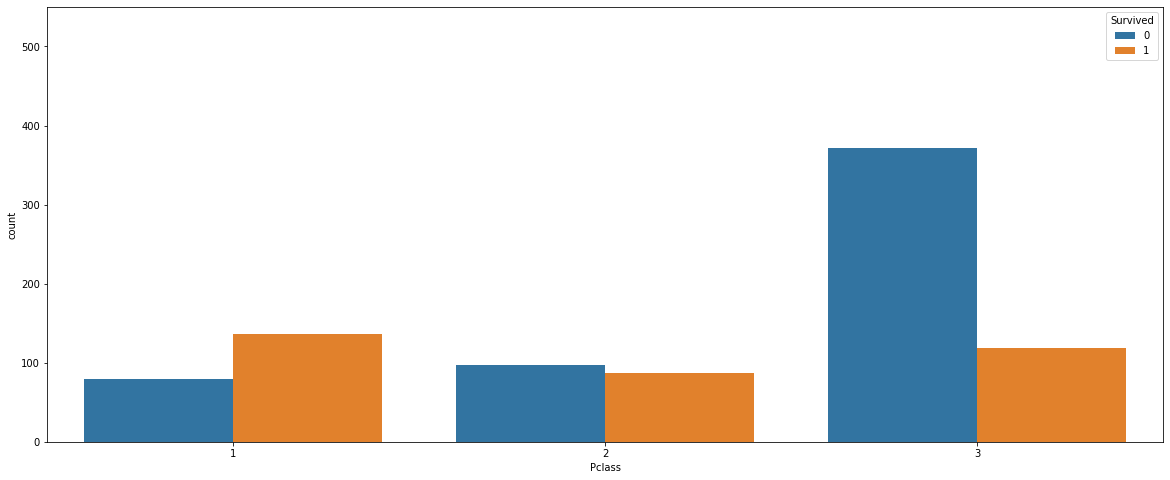

In [31]:
plt.figure(figsize=(20, 8))

fig_2=sns.countplot(data=train_data, x="Pclass", hue="Survived")
fig_2.set_xticklabels(['1','2','3'])
plt.ylim(0,550)
plt.show(fig_2.containers[0]);
plt.show(fig_2.containers[1]);

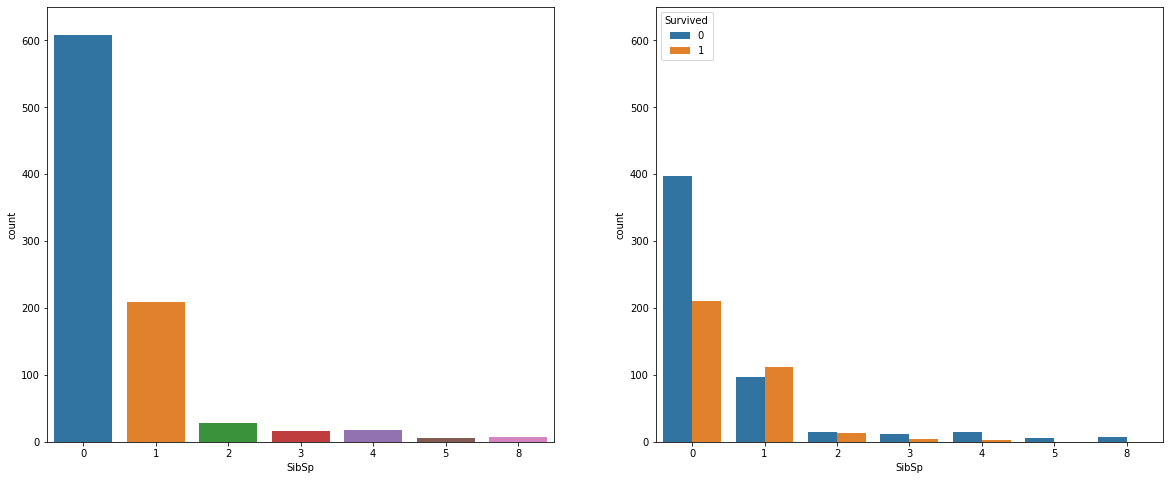

In [32]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.ylim(0,650)
sns.countplot(data=train_data,x="SibSp")

plt.subplot(1,2,2)
fig_4=sns.countplot(data=train_data,x="SibSp", hue="Survived")
plt.ylim(0,650)
plt.show(fig_4.containers[0])
plt.show(fig_4.containers[1])

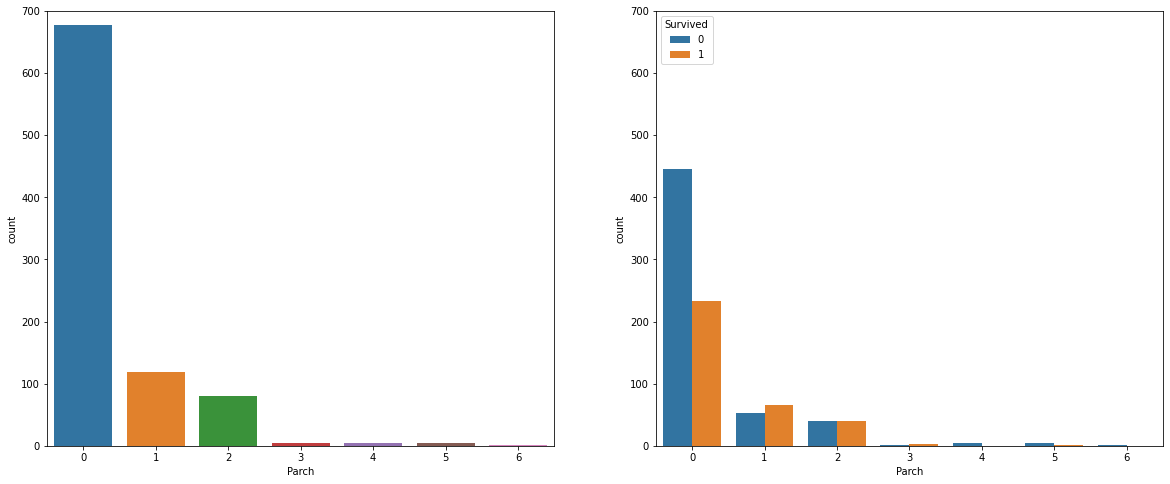

In [33]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.ylim(0,700)
sns.countplot(data=train_data,x="Parch")

plt.subplot(1,2,2)
fig_4 = sns.countplot(data=train_data,x='Parch', hue="Survived")
plt.ylim(0,700)
plt.show(fig_4.containers[0]);
plt.show(fig_4.containers[1]);

# Preprocessing and Classification

 First of all we split the Survived column from the other columns and use SMOTE to make the "Survived" column distribution equal

In [40]:
X =train_data.drop(["Survived"],axis=1)
y = train_data["Survived"]

# Show distribution of 0 and 1
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,3,0,22.0,1,0,7.2500,3.0,3.0
1,2,1,1,38.0,1,0,71.2833,2.0,3.0
2,3,3,1,26.0,0,0,7.9250,3.0,3.0
3,4,1,1,35.0,1,0,53.1000,3.0,3.0
4,5,3,0,35.0,0,0,8.0500,3.0,3.0


In [42]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
sm = SMOTE(random_state=42)
X,y =sm.fit_resample(X,y)
y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [44]:
# Split train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((878, 9), (220, 9), (878,), (220,))

### Prepare the models for testing

In [73]:

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [78]:

### Creata an empty list and append each model to list
models=[]

models.append(("LOGR", LogisticRegression(solver="liblinear", random_state=14)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("CART", DecisionTreeClassifier(random_state=14)))
models.append(("NB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier(random_state=14)))
models.append(("RF", RandomForestClassifier(random_state=14)))
models.append(("ET", ExtraTreesClassifier(random_state=14)))
models.append(("GB", GradientBoostingClassifier(random_state=14)))
## Empty list for results of the evaluation
model_results = []

In [79]:
# Function: for each element in model list there will be an evaluation -> Results will be added to results df
def train_all_models(models):
    i = 1
    plt.figure(figsize=(25, 15))
    for method, model in models:
        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)

        f_score = model.score(X_test, y_test)
        model_results.append((method, f_score))

        plt.subplot(3, 4, i)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Greens")
        plt.title(model, fontsize=14)
        plt.xlabel('Test', fontsize=12)
        plt.ylabel('Predict', fontsize=12)
        df = pd.DataFrame(model_results).transpose()
        i+=1

# Show confusion matrix for each trained model 
    plt.show()
    df = pd.DataFrame(model_results)
    return df

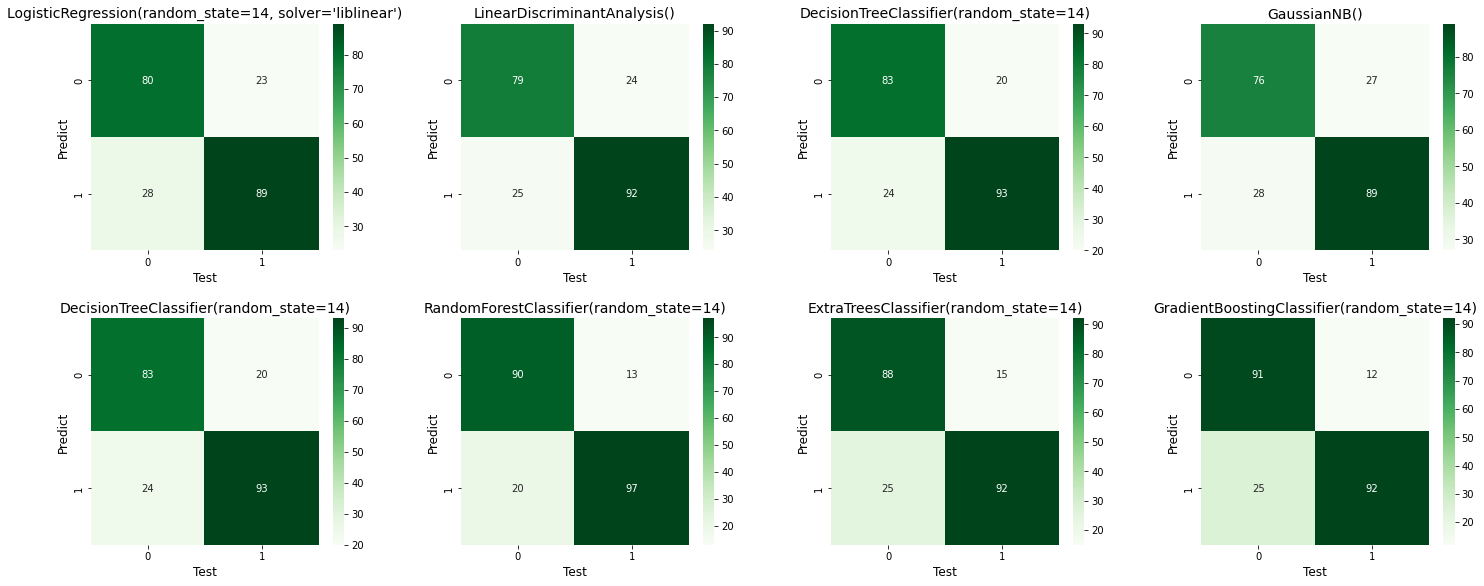

In [80]:
## Sort df for later visualizations
best_models = train_all_models(models)
best_models = best_models.sort_values([1],ascending=False)

In [81]:
best_models

,0,1
5,RF,0.850000
7,GB,0.831818
6,ET,0.818182
2,CART,0.800000
4,DT,0.800000
1,LDA,0.777273
0,LOGR,0.768182
3,NB,0.750000


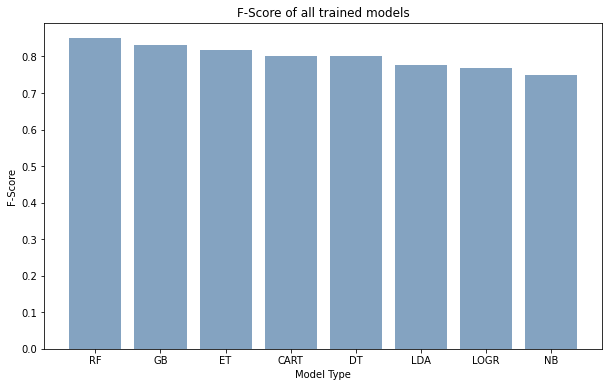

In [82]:
y_pos = np.arange(len(best_models[0]))
plt.figure(figsize=(10, 6))
plt.bar(y_pos, best_models[1], color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, best_models[0])
plt.title('F-Score of all trained models')
plt.xlabel('Model Type')
plt.ylabel('F-Score')
plt.show()

In [ ]:
results,names=[],[]

for name , model in models

### Hyperparameter Tuning of best 3 models

In [85]:
## top 3 models and define new -> for randomized search cv
RF  =RandomForestClassifier()
ET = ExtraTreesClassifier()
GB = GradientBoostingClassifier();

RF.fit(X_train, y_train)
ET.fit(X_train, y_train)
GB.fit(X_train, y_train);

In [86]:
from sklearn.model_selection import RandomizedSearchCV

## Grid Search for RandomForestClassifer, ExtraTreesClassifier,GradientBoostingClassifier

In [87]:
# RandomForesClassifier
grid_param_RF = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

RF_grid_search = RandomizedSearchCV(estimator=RF, param_distributions=grid_param_RF, cv= 10, verbose=1, random_state=14)
RF_grid_search.fit(X_train, y_train)

RF_best_grid = RF_grid_search.best_estimator_
print(RF_best_grid)
print(RF_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(max_depth=36, max_features=2, n_estimators=88)
0.823419540229885


In [88]:
ExtraTreesClassifier
grid_param_ET = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

ET_grid_search = RandomizedSearchCV(estimator=ET, param_distributions=grid_param_ET, cv= 10, verbose=1, random_state=14)
ET_grid_search.fit(X_train, y_train)

ET_best_grid = ET_grid_search.best_estimator_

print(ET_best_grid)
print(ET_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
ExtraTreesClassifier(max_depth=55, max_features=1, n_estimators=18)
0.8166274817136886


In [89]:
# GradientBoostingClassifier
grid_param_GB = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

GB_grid_search = RandomizedSearchCV(estimator=GB, param_distributions=grid_param_GB, cv= 10, verbose=1, random_state=14)
GB_grid_search.fit(X_train, y_train)

GB_best_grid = GB_grid_search.best_estimator_

print(GB_best_grid)
print(GB_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GradientBoostingClassifier(max_depth=77, max_features=1, n_estimators=78)
0.8177246603970743


## Results of grid search

In [90]:
# Show results of grid search
print(RF_best_grid, "\n Score: ", RF_grid_search.best_score_, "\n ------------------------------------")
print(ET_best_grid, "\n Score: ", ET_grid_search.best_score_, "\n ------------------------------------")
print(GB_best_grid, "\n Score: ", GB_grid_search.best_score_, "\n ------------------------------------")

RandomForestClassifier(max_depth=36, max_features=2, n_estimators=88) 
 Score:  0.823419540229885 
 ------------------------------------
ExtraTreesClassifier(max_depth=55, max_features=1, n_estimators=18) 
 Score:  0.8166274817136886 
 ------------------------------------
GradientBoostingClassifier(max_depth=77, max_features=1, n_estimators=78) 
 Score:  0.8177246603970743 
 ------------------------------------


### Taking best Model and train it again with best Hyperparameters

In [91]:
# ExtraTreesClassifier is best one, create model and learn again with defined parameters of grid search
best_model = RandomForestClassifier(max_depth=20, max_features=1, n_estimators=62)
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

print(f"Classification report\n {classification_report(pred, y_test)}")
print(f"Score = {best_model.score(X_test,y_test)}")

Classification report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       103
           1       0.84      0.84      0.84       117

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220

Score = 0.8272727272727273


### Using the best_model for test.csv

In [92]:
test_data=pd.read_csv('/content/test.csv')
test_data=data_pipeline(test_data)

In [94]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,0,34.5,0,0,7.8292,1,3.0
1,893,3,1,47.0,1,0,7.0000,3,3.0
2,894,2,0,62.0,0,0,9.6875,1,3.0
3,895,3,0,27.0,0,0,8.6625,3,3.0
4,896,3,1,22.0,1,1,12.2875,3,3.0


In [95]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [96]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Deck         418 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [97]:
test_data["Survived"]=best_model.predict(test_data)

In [98]:
test_data[["PassengerId","Survived"]].to_csv("submission.csv", index=False)

In [100]:
submission=pd.read_csv("/content/submission.csv")
submission.shape

(418, 2)

In [102]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
